In [1]:
import numpy as np
import pandas as pd 
from keras.datasets import reuters

In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10_000)

2113536/2110848 [==============================] - 0s 0us/step


/usr/local/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [5]:
len(train_data) 

8982

In [6]:
len(test_data)

2246

In [7]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [8]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

557056/550378 [==============================] - 0s 0us/step


In [9]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [10]:
train_labels[10]

3

In [11]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i , sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [12]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [13]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [14]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

In [15]:
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [16]:
one_hot_test_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
#built in one hot method in keras
from keras.utils.np_utils import to_categorical 

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [18]:
one_hot_test_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [19]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [20]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [22]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [24]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 55ms/step - loss: 3.3423 - accuracy: 0.3639 - val_loss: 1.9230 - val_accuracy: 0.6600
Epoch 2/20
16/16 [==============================] - 0s 29ms/step - loss: 1.6235 - accuracy: 0.7062 - val_loss: 1.3731 - val_accuracy: 0.7250
Epoch 3/20
16/16 [==============================] - 1s 32ms/step - loss: 1.1443 - accuracy: 0.7762 - val_loss: 1.1672 - val_accuracy: 0.7520
Epoch 4/20
16/16 [==============================] - 1s 33ms/step - loss: 0.8784 - accuracy: 0.8151 - val_loss: 1.0486 - val_accuracy: 0.7740
Epoch 5/20
16/16 [==============================] - 1s 33ms/step - loss: 0.6974 - accuracy: 0.8490 - val_loss: 0.9775 - val_accuracy: 0.7910
Epoch 6/20
16/16 [==============================] - 1s 32ms/step - loss: 0.5583 - accuracy: 0.8847 - val_loss: 0.9375 - val_accuracy: 0.8000
Epoch 7/20
16/16 [==============================] - 1s 32ms/step - loss: 0.4509 - accuracy: 0.9081 - val_loss: 0.9405 - val_accuracy: 0.7980
Epoch 8/20
16

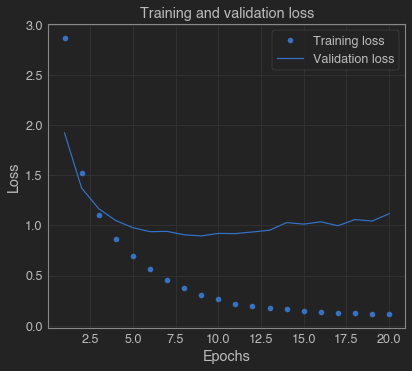

In [26]:
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style()

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) +1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [31]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

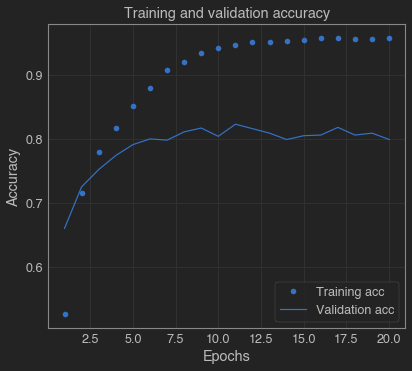

In [33]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [34]:
#new model
model = models.Sequential()
model.add(layers.Dense(64, activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model.fit(partial_x_train,
                   partial_y_train,
                   epochs=9,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Epoch 1/9
16/16 [==============================] - 2s 68ms/step - loss: 3.1467 - accuracy: 0.4437 - val_loss: 1.7485 - val_accuracy: 0.6430
Epoch 2/9
16/16 [==============================] - 0s 26ms/step - loss: 1.5165 - accuracy: 0.6857 - val_loss: 1.3297 - val_accuracy: 0.7200
Epoch 3/9
16/16 [==============================] - 0s 28ms/step - loss: 1.0862 - accuracy: 0.7705 - val_loss: 1.1509 - val_accuracy: 0.7500
Epoch 4/9
16/16 [==============================] - 0s 28ms/step - loss: 0.8687 - accuracy: 0.8144 - val_loss: 1.0580 - val_accuracy: 0.7740
Epoch 5/9
16/16 [==============================] - 0s 29ms/step - loss: 0.6748 - accuracy: 0.8527 - val_loss: 0.9777 - val_accuracy: 0.7980
Epoch 6/9
16/16 [==============================] - 1s 32ms/step - loss: 0.5334 - accuracy: 0.8920 - val_loss: 0.9224 - val_accuracy: 0.8060
Epoch 7/9
16/16 [==============================] - 1s 34ms/step - loss: 0.4348 - accuracy: 0.9111 - val_loss: 0.9265 - val_accuracy: 0.8000
Epoch 8/9
16/16 [===

In [35]:
results = model.evaluate(x_test, one_hot_test_labels)
results

71/71 [==============================] - 0s 2ms/step - loss: 0.9857 - accuracy: 0.7876


[0.9857438802719116, 0.7876224517822266]

In [36]:
#baseline

import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.1856634016028495

In [37]:
predictions = model.predict(x_test)
predictions[0].shape

(46,)

In [38]:
np.sum(predictions[0])

1.0

In [39]:
np.argmax(predictions[0])

3

In [40]:
predictions[0]

array([4.2738593e-06, 2.6286475e-04, 7.4550611e-05, 8.8265163e-01,
       9.4956718e-02, 4.1023313e-07, 2.2699280e-05, 4.4071694e-05,
       6.7025656e-04, 9.1011198e-06, 6.2443418e-05, 6.1792289e-03,
       2.1041637e-04, 4.8803742e-04, 1.2236086e-05, 1.1171853e-05,
       9.8724337e-04, 9.2544760e-05, 3.7353454e-04, 2.5956205e-03,
       7.0097670e-03, 3.1561131e-04, 4.5738376e-05, 2.1168176e-04,
       4.2184012e-05, 1.5890992e-05, 5.1991710e-06, 2.6304342e-05,
       4.3247928e-05, 1.8819180e-04, 1.8073684e-04, 1.4623659e-05,
       5.6226010e-05, 1.0652817e-05, 4.7632263e-04, 2.6960868e-05,
       7.9205417e-04, 1.1368868e-04, 5.8172668e-06, 3.4475964e-04,
       2.5781419e-04, 3.8066850e-05, 4.1226567e-06, 2.7658616e-05,
       3.4745648e-05, 2.9779005e-06], dtype=float32)